# Assignment 1 - Part A

In this assignment you will import and explore/analyze a **Wine dataset** for classification. You will explore which ML algorithms are best to classify this and you will present your best solution. 
You already worked your way through a few tutorials and her you can integrate your learned knowledge

For this assignment you will use the **Wine dataset** that is on of the smaller classification datasets that are implemented in sklearn https://scikit-learn.org/stable/datasets/toy_dataset.html
(Next assignment we will use a larger real-world dataset)

These are the generic steps to be taken
1. Frame the problem and look at the big picture.
2. Get the data.
3. Explore the data to gain insights.
4. Prepare the data to better expose the underlying data patterns to Machine Learning algorithms
5. Explore many different models and short-list the best ones.
6. Fine-tune your models and combine them into a great solution.
7. Present your solution.
8. Launch, monitor, and maintain your system.
9. Additional Questions

In the Notebook this structure is used for dividing the different steps, so make sure you do the implementation and analisis at these location in the notebook. 

You may add additinal code blocks, but keep the seperation of the given structure.

At the end of each block summarize / comment / conclude your current step in the given textblocks.

At the end you have to hand in this notebook together with the notebook of part B, when you hand it in you should make sure that you saved it with all output visible. So we can evaluate your notebooks output without directly ruinning it.
In addition (to be sure) you should also save a pdf of the final result.


```
Imad Hanzaz, Yannick Urselmann, Jaylong Verschuren
```


# 1. Frame the problem and look at the big picture
Describe the problem at hand and explain your approach

```
# Place your comments / conclusions / insight here
```


# 2. Get the data.

Initialize the system, get all needed libraries, retreive the data and import it

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification



In [63]:
wine = datasets.load_wine()

```
# Place your comments / conclusions / insight here
```


# 3. Explore the data to gain insights.

Explore the data in any possible way, visualize the results (if you have multiple plots of the same kind of data put them in one larger plot)

### Methods from tutorial 1 and 2 ###

In [64]:
print(wine.feature_names)
print(wine.target_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
['class_0' 'class_1' 'class_2']


In [65]:
X = wine.data
Y = wine.target

In [66]:
X.shape

(178, 13)

In [67]:
Y.shape

(178,)

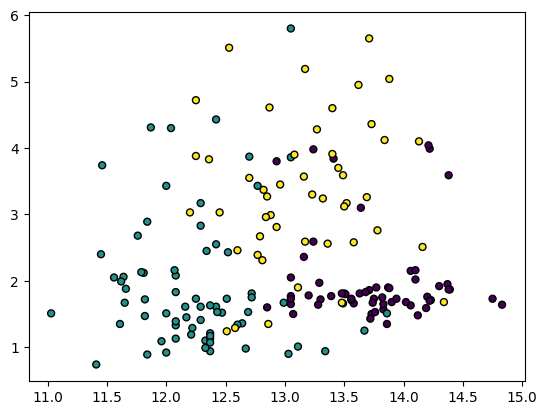

In [68]:
plt.scatter(X[:,0], X[:,1], marker="o", s=25, edgecolor="k", c=Y)

### Methods from tutorial 3 ###

In [69]:
data = pd.DataFrame(wine.data, columns = wine.feature_names)
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [70]:
print(data.loc[5])
print(data.shape)

alcohol                           14.20
malic_acid                         1.76
ash                                2.45
alcalinity_of_ash                 15.20
magnesium                        112.00
total_phenols                      3.27
flavanoids                         3.39
nonflavanoid_phenols               0.34
proanthocyanins                    1.97
color_intensity                    6.75
hue                                1.05
od280/od315_of_diluted_wines       2.85
proline                         1450.00
Name: 5, dtype: float64
(178, 13)


In [71]:
print(data.describe())

          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.9

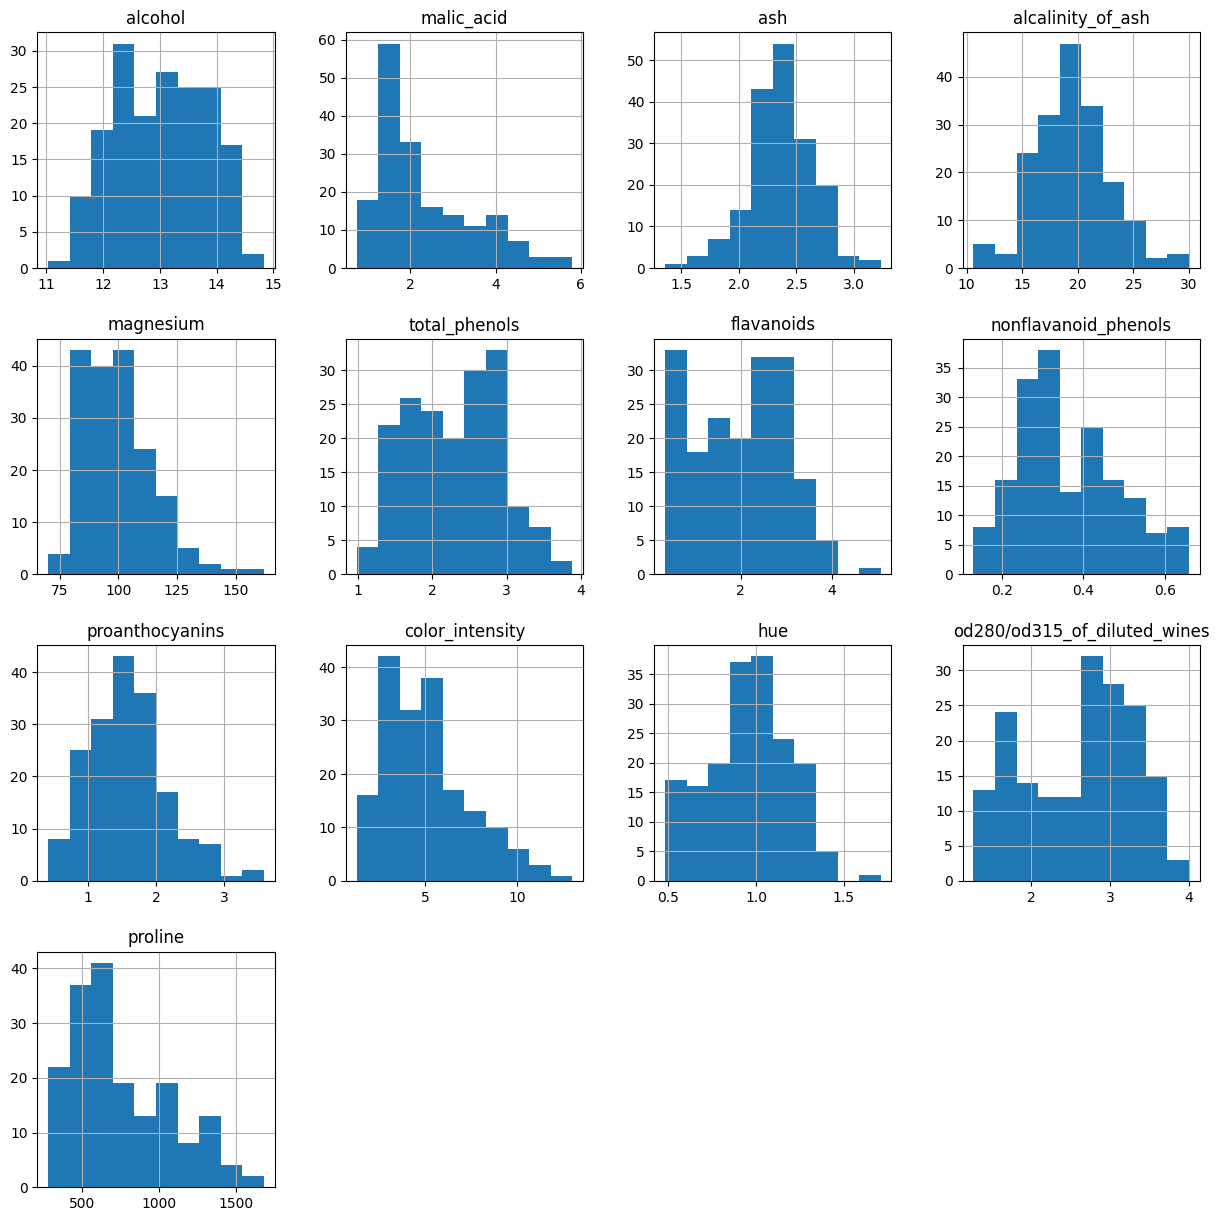

In [72]:
data.hist(figsize=(15,15))
plt.show()

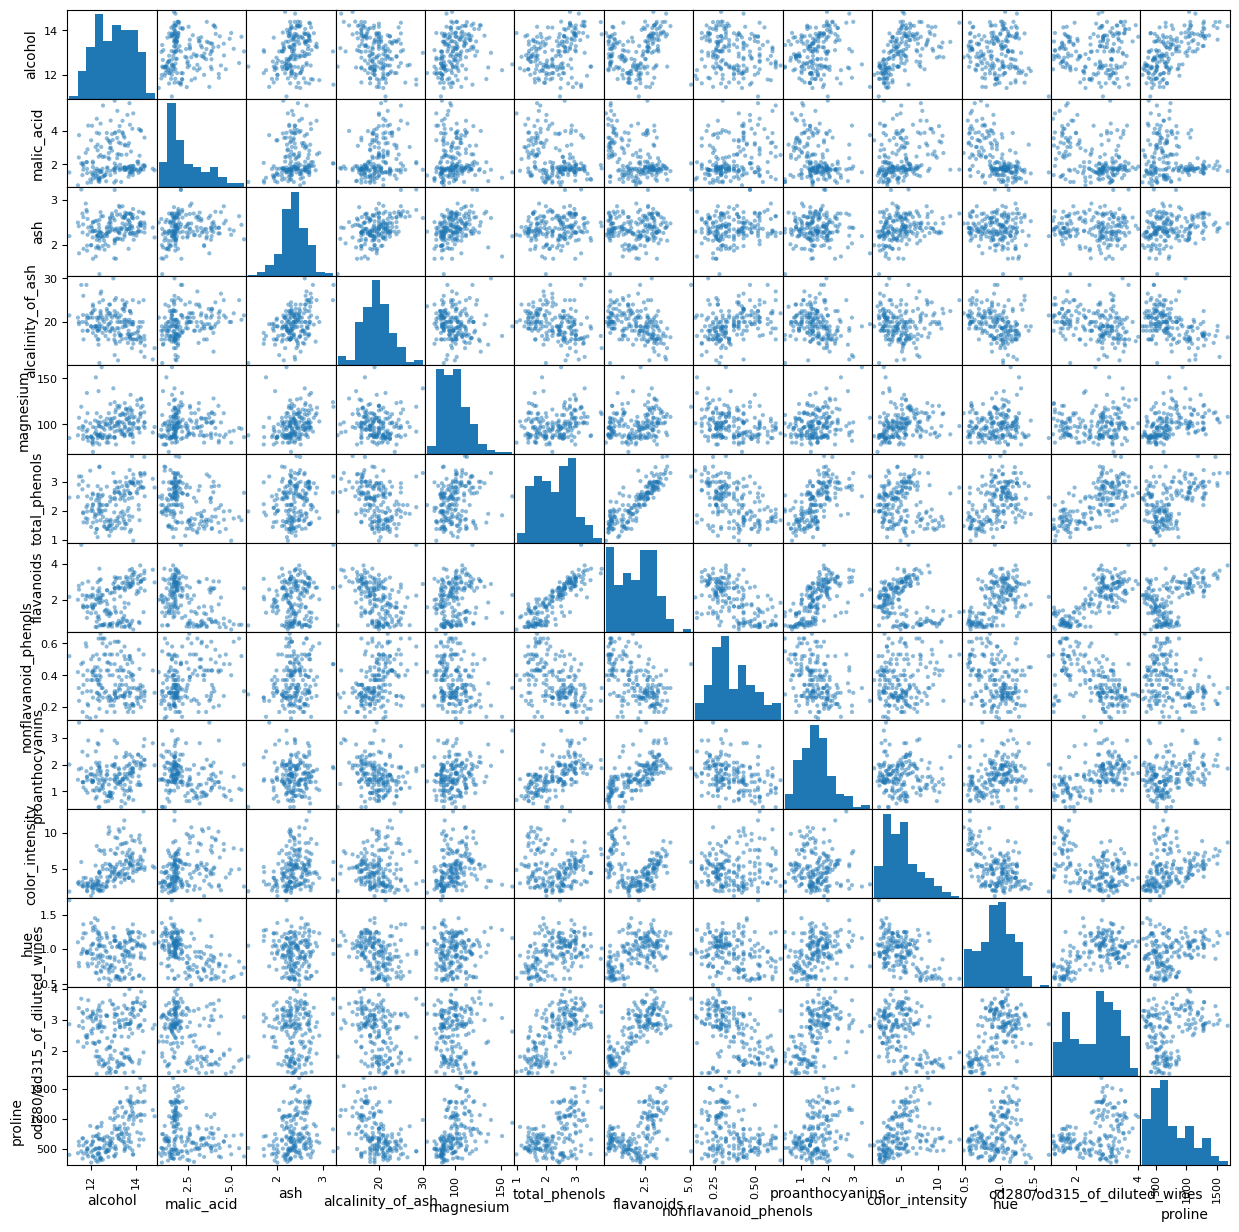

In [78]:
from pandas.plotting import scatter_matrix

scatter_matrix(data, figsize=(15,15))
plt.show()

In [80]:
corrmat = data.corr()

corrmat.style.background_gradient(cmap='viridis').set_precision(2)

C:\Users\yanni\AppData\Local\Temp\ipykernel_30376\1488670494.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corrmat.style.background_gradient(cmap='viridis').set_precision(2)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,1.00,0.09,0.21,-0.31,0.27,0.29,0.24,-0.16,0.14,0.55,-0.07,0.07,0.64
malic_acid,0.09,1.00,0.16,0.29,-0.05,-0.34,-0.41,0.29,-0.22,0.25,-0.56,-0.37,-0.19
ash,0.21,0.16,1.00,0.44,0.29,0.13,0.12,0.19,0.01,0.26,-0.07,0.00,0.22
alcalinity_of_ash,-0.31,0.29,0.44,1.00,-0.08,-0.32,-0.35,0.36,-0.20,0.02,-0.27,-0.28,-0.44
magnesium,0.27,-0.05,0.29,-0.08,1.00,0.21,0.20,-0.26,0.24,0.20,0.06,0.07,0.39
total_phenols,0.29,-0.34,0.13,-0.32,0.21,1.00,0.86,-0.45,0.61,-0.06,0.43,0.70,0.50
flavanoids,0.24,-0.41,0.12,-0.35,0.20,0.86,1.00,-0.54,0.65,-0.17,0.54,0.79,0.49
nonflavanoid_phenols,-0.16,0.29,0.19,0.36,-0.26,-0.45,-0.54,1.00,-0.37,0.14,-0.26,-0.50,-0.31
proanthocyanins,0.14,-0.22,0.01,-0.20,0.24,0.61,0.65,-0.37,1.00,-0.03,0.30,0.52,0.33
color_intensity,0.55,0.25,0.26,0.02,0.20,-0.06,-0.17,0.14,-0.03,1.00,-0.52,-0.43,0.32


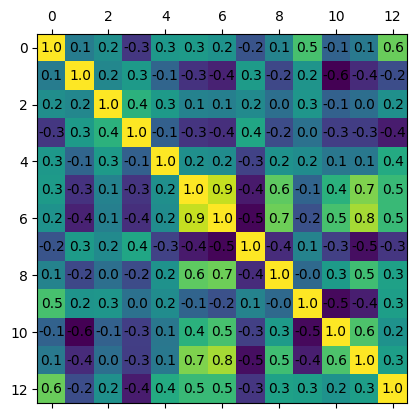

In [82]:
def plotMatrix(data):
  fig, ax = plt.subplots()
  # Using matshow here just because it sets the ticks up nicely. imshow is faster.
  ax.matshow(data, cmap='viridis')
  for (i, j), z in np.ndenumerate(data):
     ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
  plt.show()
  
plotMatrix(corrmat)

```
# Place your comments / conclusions / insight here
```


# 4. Prepare the data to better expose the underlying data patterns to Machine Learning algorithms

prepare your data, is it normalized? are there outlier? Make a training and a test set.

In [73]:
# YOUR CODE HERE 

```
# Place your comments / conclusions / insight here
```


# 5. Explore many different models and short-list the best ones.

Explore / train and list the top 3 algorithms that score best on this dataset.

In [74]:
# YOUR CODE HERE 

```
# Place your comments / conclusions / insight here
```


# 6. Fine-tune your models and combine them into a great solution.

can you get better performance within a model? e.g if you use a KNN classifier how does it behave if you change K (k=3 vs k=5 vs k=?). Which parameters are here to tune in the chosen models? 

In [75]:
# YOUR CODE HERE 

```
# Place your comments / conclusions / insight here
```


# 7. Present your solution.

Explain why you would choose for a specific model

In [76]:
# YOUR CODE HERE 

```
# Place your comments / conclusions / insight here
```


# 8. Launch, monitor, and maintain your system.

Deployment we will do in the next assignment!

# 9. Additional Questions

* Explain in detail how you think that the top 3 chosen algorithms work?
* Explain why you think that your chosen algorithm outperforms the rest? 

```
# Place your comments / conclusions / insight here
```
